a).
Integración con método de Euler

El método de euler es el integrador mas sencillo, desarrollamos

$f(x+h)=f(x)+f\prime (x)h$

$f\prime (x)=\frac{f(x)-f(x+h)}{h}$

ahora, como ecuación diferencial $f\prime (x)=g(x,f(x))$

No sabemos cuanto es $f(x)$ pero si sabemos que $f(x_0)=f_0$ por las condiciones iniciales, entonces


$f_1=f_0+f_0\prime h = f_0 +g(x_0,f_0)h$

si seguimos el algoritmo, el método queda

$f(x_i+1)=f(x_i)+g(x_i,f(x_i))h$

In [14]:
from numpy import *
from pylab import *
%matplotlib inline

In [21]:
def euler(funcion,p_ini,t_final,h=0.01):#definimos las variables: la ecuación que usaremos, el punto inicial, el final y los pasos.
    tiempos = arange(p_ini[0],t_final+h,h)#será un arreglo que va desde el punto inicial hasta el final +1, en pasos de h
    y = [0]*len(tiempos) #zeros(len(tiempos))con la longitud de tiempos
    y[0] = p_ini[1]#aqui le decimos que el primer elemento de y será el punto inicial
    for i in range(len(tiempos)-1):#aqui le quitamos uno, para que el primer elemento y[i-1] quede como y[0] el primer punto
        y[i+1] = y[i] + funcion(y[i],tiempos[i])*h#aquí finalmente escribimos que algoritmo debe seguir
    solucion = [tiempos,y]
    return solucion

b). Integración sobre serie de Taylor a segundo orden

En este metodo desarrollamos la serie de Taylor a segundo orden 

$f(x,y)=f(x_n,y_n)+f\prime (x_n,y_n)h + \frac{f\prime\prime (x_n,y_n)h^2}{2}+O(h^3)$

donde 

$y \prime (x) = f(x,y)$

$y(x_0)  =y_0$ condiciones iniciales

finalemente quedará de la forma 

$$
y_{n+1} = y_n + hf(x_n,y_n) + \frac{h^2}{2} \left(
\frac{\partial f}{\partial x}+ \frac{\partial f}{\partial y} f \right)
$$

aunque si queremos integrar en varias variables quedará de la forma

$$
\vec y_{n+1} = \vec y_n +h\vec f+ \frac{1}{2}h² \left(
\frac{\partial \vec f}{\partial x} + \mathbb{J}\vec f
\right)
$$
donde $f$ es $f(x_n, \vec y_n)$, $\mathbb{J}$ es el Jacobiano evaluado en este punto. $(x_n, \vec y_n)$ 

In [36]:

def segundo_orden1(ec_diff,p_ini,t_final,ec_jac,h=0.1):
    tiempo=arange(0,t_final+h,h) #
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[0]
        y[i+1] += 0.5*h*h*ec_jac(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])
    return tiempo,y



b). Métodod de Runge-Kutta de segundo orden

El método de Runge-Kutta trata de integrar rectángulo por rectángulo, hacemos particiones de tamaño h y aproximamos $f(x_0 +h)$ en series de Taylor

$Y_{n+1}= Y_n + f(X_{n+\frac{1}{2}}h,Y_{n+\frac{1}{2}}k)$

In [50]:
def rk2(ec,p_ini,x,h=0.1):#definios las variables, ec como la ecuación, p como el punto inicial, y h como los pasos
    tiempos = arange(x[0],x[1]+h,h)#el tiempo va de x[0] a x[1]+h, en pasos de h
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini#el primer elemento en la primer entrada será el punto inicial
    for i in xrange(len(tiempos)-1):
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:]=sol[i,:]+h*f
    return tiempos,sol



c). Método de Ruge-Kutta de cuarto orden
no hay método a tercer orden, básicamente sigue el mismo algoritmo pero con desarrollo a cuarto orden

In [24]:
def rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [31]:
def fun(y,t):
    return -0.5*t-sin(y)


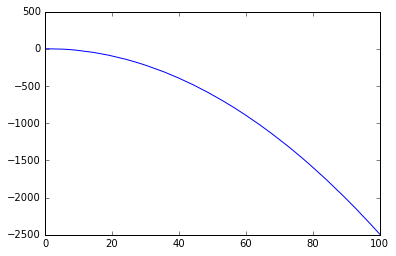

In [59]:
sol = euler(fun,[0,1],100,0.1)
plot(sol[0],sol[1])
show()

In [39]:
def fun1(y,t):
    return -0.5*t-sin(y)

def d_fun1(y,t):
    return -cos(y),-0.5

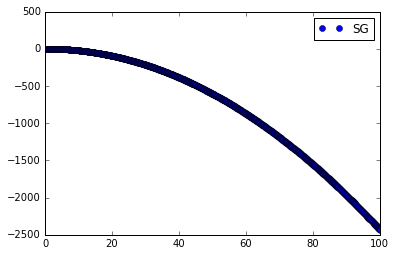

In [55]:
sol = segundo_orden1(fun1,1,100,d_fun1)
plot(sol[0],sol[1],'o',label="SG")
legend()
show()


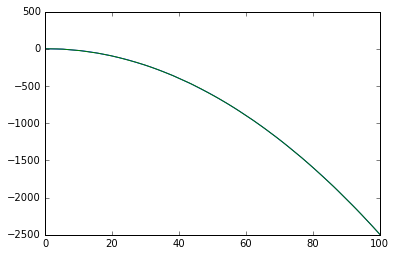

In [53]:
sol = rk2(fun1,[1,0],[0,100],0.01)
plot(sol[0],sol[1])
show()

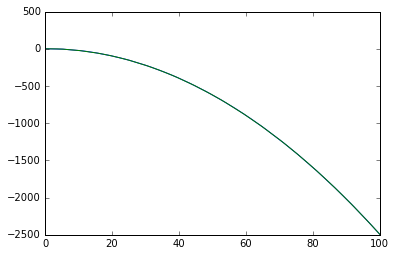

In [54]:
sol = rk4(fun1,[1,0],[0,100],0.01)
plot(sol[0],sol[1])
show()